In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
import os
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

In [3]:
dataset_dir = 'brain_tumor_dataset'

In [4]:
from torchvision import transforms
# Define image transformations for preprocessing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # If the images are colored, convert to grayscale
    transforms.Resize((28, 28)),  # Resize to 28x28, for example
    transforms.ToTensor(), # Convert images to PyTorch tensors
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(),  # Randomly flip the image vertically
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values with mean=0.5 and std=0.5
])

In [5]:
# Load the dataset
dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

# Split dataset into training and testing sets
train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=0.2, random_state=42)

# Create subset datasets for train and test
train_dataset = Subset(dataset, train_idx)
test_dataset = Subset(dataset, test_idx)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
# Print dataset info
print(f"Total images: {len(dataset)}")
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Verify classes in the dataset
print(f"Classes: {dataset.classes}")

Total images: 254
Training set size: 203
Test set size: 51
Classes: ['No-tumor', 'Yes-tumor']


In [7]:
# Getting the count of each class 
# Initialize empty dictionary
cases_count = {}

# Go through all labels
labels = [train_dataset.dataset.targets[i] for i in train_dataset.indices]

for label in labels:
    if label in cases_count:
        cases_count[label] += 1
    else:
        cases_count[label] = 1

# Print with class names
class_names = train_dataset.dataset.classes
for class_idx, count in cases_count.items():
    print(f"{class_names[class_idx]}: {count}")


No-tumor: 79
Yes-tumor: 124


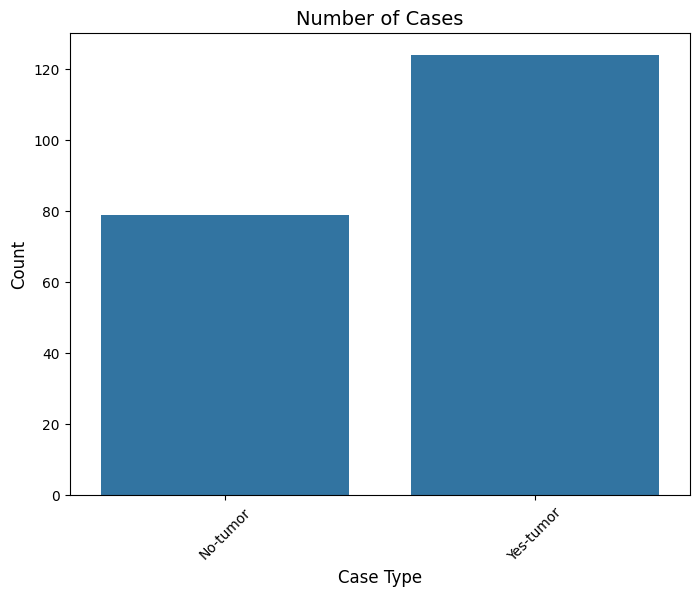

In [8]:
# If cases_count is a dictionary with class names (like 'no-tumor', 'yes-tumor')
# Convert numeric labels to string labels
label_map = {0: 'No-tumor', 1: 'Yes-tumor'}
labels = [label_map[label] for label in cases_count.keys()]
counts = list(cases_count.values())

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=counts)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [9]:
# Get 5 samples from each class (no-tumor and yes-tumor)
No_Tumor_Samples = [train_dataset[i][0] for i in range(len(train_dataset)) if train_dataset[i][1] == 0][:5]
Yes_Tumor_Samples = [train_dataset[i][0] for i in range(len(train_dataset)) if train_dataset[i][1] == 1][:5]

# Combine the samples
samples = No_Tumor_Samples + Yes_Tumor_Samples

# Clean up individual variables if needed
del No_Tumor_Samples, Yes_Tumor_Samples


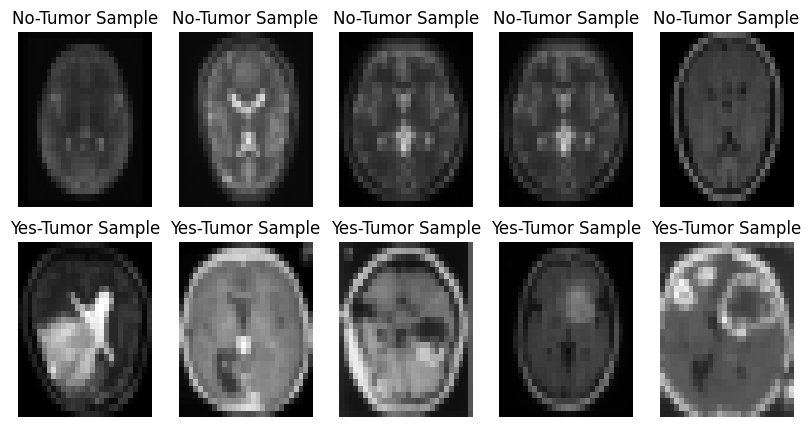

In [10]:
import matplotlib.pyplot as plt

# Initialize the graph where images will be displayed
f, ax = plt.subplots(2, 5, figsize=(10, 5))

# Display 5 samples for each class (no-tumor and yes-tumor)
for i in range(10):
    img = samples[i] # Directly using the image from the sample list
    img = img * 0.5 + 0.5
    img = img.permute(1, 2, 0).numpy()
    # Check if image is grayscale or RGB
    if img.shape[-1] == 1:  # Grayscale (single channel)
        ax[i//5, i%5].imshow(img[:, :, 0], cmap='gray')  # Show as grayscale
    else:  # RGB (3 channels)
        ax[i//5, i%5].imshow(img)  # Show as RGB
    
    # Setting titles based on the class
    if i < 5:
        ax[i//5, i%5].set_title("No-Tumor Sample")
    elif i < 10:
        ax[i//5, i%5].set_title("Yes-Tumor Sample")
    
    # Remove axes for cleaner display
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

# Display the plot
plt.show()


In [11]:
from pathlib import Path

# Assuming train_dir is a string, convert it to a Path object
train_dir = Path(train_dataset.dataset.root)  # Convert train_dir to Path object

# Now you can use the / operator to join paths
No_tumor_dir = train_dir / 'No-tumor'
Yes_tumor_dir = train_dir / 'Yes-tumor'

In [12]:
No_tumor = No_tumor_dir.glob('*.jpg')
Yes_tumor = Yes_tumor_dir.glob('*.jpg')
train_data = []
train_labels = []

In [13]:
for img_path in No_tumor:
    # Read the image
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (28, 28))  # Resize image to 28x28
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])  # Convert grayscale to RGB if necessary
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = np.array(img)  # Ensure it's a numpy array
    img = img / 255  # Normalize the image

    label = 'No-Tumor'  # Label for No-Tumor class
    train_data.append(img)  # Append image to train_data
    train_labels.append(label)  # Append label to train_labels

In [14]:
for img_path in Yes_tumor:
    # Read the image
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (28, 28))  # Resize image to 28x28
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])  # Convert grayscale to RGB if necessary
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = np.array(img)  # Ensure it's a numpy array
    img = img / 255  # Normalize the image

    label = 'Yes-Tumor'  # Label for Yes-Tumor class
    train_data.append(img)  # Append image to train_data
    train_labels.append(label)  # Append label to train_labels

In [15]:
train_data = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels = np.array(train_labels)
print('Total number of validation example: ', train_data.shape)
print('Total number of Labels : ', train_labels.shape)

Total number of validation example:  (245, 28, 28, 3)
Total number of Labels :  (245,)


In [16]:
train_data[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [17]:
train_labels = pd.DataFrame(train_labels, columns = ['label'],index=None)
train_labels

,label
0,No-Tumor
1,No-Tumor
2,No-Tumor
3,No-Tumor
4,No-Tumor
...,...
240,Yes-Tumor
241,Yes-Tumor
242,Yes-Tumor
243,Yes-Tumor


In [18]:
train_labels['label'].unique()

array(['No-Tumor', 'Yes-Tumor'], dtype=object)

In [19]:
train_labels['label'] = train_labels['label'].map({'No_tumor':0,'Yes_tumor':1})

In [20]:
print(train_data.shape)
print(train_labels.shape)

(245, 28, 28, 3)
(245, 1)


In [21]:
train_labels.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    245
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.10,random_state = 42)

In [23]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (220, 28, 28, 3)
Testing Data X :  (49, 28, 28, 3)
Training Data y :  (220, 1)
Testing Data y :  (49, 1)
Validating Data X :  (25, 28, 28, 3)
Validating Data y (25, 1)
Image Size :  (28, 28, 3)


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model by extending nn.Module class
class CNNModel(nn.Module):
    def __init__(self, num_classes=1):
        super(CNNModel, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1, padding=1)  # RGB (3 channels)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Adaptive pooling to get fixed size output regardless of input size
        #self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
       # Fully connected layers
        self.fc1 = nn.Linear(1152 , 256)  # Assuming input size is 28x28
        self.fc2 = nn.Linear(256, num_classes)
        
        # Dropout layer for regularization
        self.dropout = nn.Dropout2d(p=0.5)

    def forward(self, x):
        # Add print statements to debug shapes
        print(f"Input shape: {x.shape}")
        # Convolutional layers with Leaky ReLU activation
        x = F.leaky_relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        
        # Flatten the tensor for the fully connected layer
        x = x.view(x.size(0), -1)
        print(f"Flattened shape: {x.shape}")
        
        # Fully connected layers with dropout and Leaky ReLU activation
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        
        # Final output layer (classification)
        x = self.fc2(x)
        
        return x

# Instantiate the model
model = CNNModel(num_classes=1)

# Print the model architecture
print(model)

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout2d(p=0.5, inplace=False)
)


Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])


C:\Users\Shiza Javed\Hello\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([11, 3, 28, 28])
Flattened shape: torch.Size([11, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([19, 3, 28, 28])
Flattened shape: torch.Size([19, 1152])
Epoch [1/20], Train Loss: 0.6295, Val Loss: 0.7171, Train Acc: 0.7094, Val Acc: 0.3922
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Siz

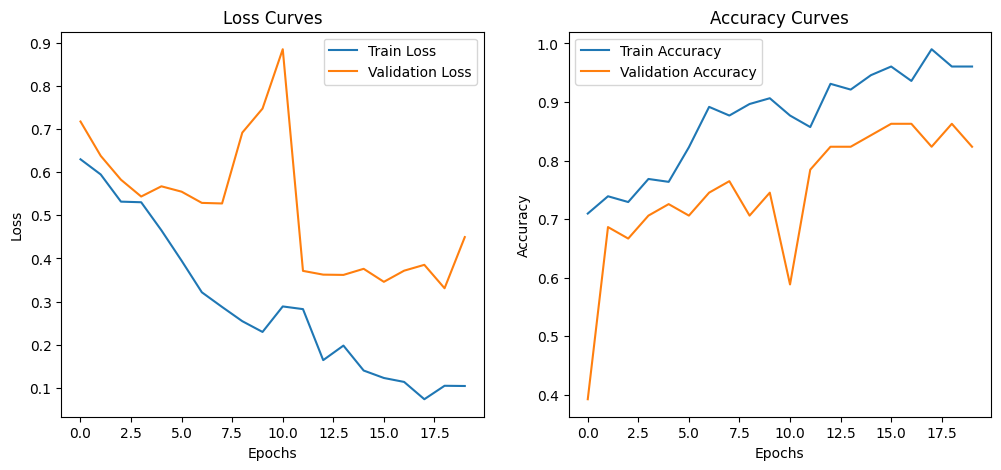

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming CNNModel, DataLoader, and datasets are defined as per previous examples

# Define model, criterion, optimizer
model = CNNModel(num_classes=1)  # Binary classification model
criterion = nn.BCEWithLogitsLoss()  # Loss function for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Early stopping parameters
early_stopping_patience = 5  # Stop training if no improvement after 5 epochs
best_loss = float('inf')
early_stopping_counter = 0

# Lists to store training and validation metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training function with early stopping
def train_model_with_early_stopping(model, train_dataloader, val_dataloader, num_epochs=20):
    global best_loss, early_stopping_counter

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for images, labels in train_dataloader:
            labels = labels.float().unsqueeze(1)  # Reshape labels for binary classification
            optimizer.zero_grad()  # Zero the parameter gradients

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimize

            # Calculate accuracy
            predictions = torch.sigmoid(outputs)
            predicted_labels = (predictions > 0.5).float()
            correct_train += (predicted_labels == labels).sum().item()
            total_train += labels.size(0)

            # Accumulate loss
            running_train_loss += loss.item()

        # Average training loss and accuracy
        train_loss = running_train_loss / len(train_dataloader)
        train_accuracy = correct_train / total_train

        # Validate the model
        val_loss, val_accuracy = evaluate_model(model, val_dataloader)

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Print metrics for each epoch
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
              f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

        # Early stopping check
        if val_loss < best_loss:
            best_loss = val_loss
            early_stopping_counter = 0  # Reset counter if validation loss improves
            # Optionally save the model
            # torch.save(model.state_dict(), 'best_model.pth')
        else:
            early_stopping_counter += 1
        
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered. Stopping training.")
            break

# Validation function
def evaluate_model(model, dataloader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    running_loss = 0.0
    
    with torch.no_grad():
        for images, labels in dataloader:
            labels = labels.float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            # Calculate accuracy
            predictions = torch.sigmoid(outputs)
            predicted_labels = (predictions > 0.5).float()
            correct += (predicted_labels == labels).sum().item()
            total += labels.size(0)

    # Return average validation loss and accuracy
    val_loss = running_loss / len(dataloader)
    val_accuracy = correct / total
    return val_loss, val_accuracy

# Function to plot training and validation curves
def plot_metrics():
    # Plot loss curves
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    
    plt.show()

# Example usage:
# Assuming train_loader and val_loader (validation data) are defined
train_model_with_early_stopping(model, train_loader, test_loader, num_epochs=20)

# After training, plot the curves
plot_metrics()

Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([19, 3, 28, 28])
Flattened shape: torch.Size([19, 1152])


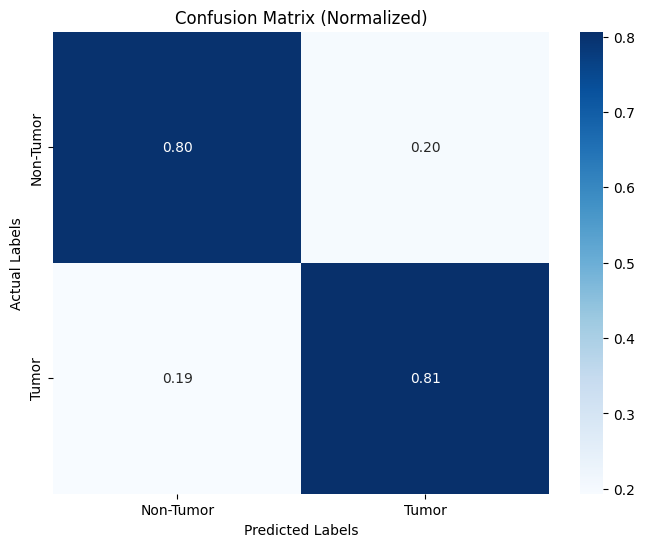

In [26]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix (optional for better visual interpretation)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix (Normalized)')
    plt.show()

# Function to evaluate model and plot confusion matrix
def evaluate_and_plot_confusion_matrix(model, dataloader, class_names):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_preds = []

    # Iterate over the dataset and collect predictions and actual labels
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            predictions = torch.sigmoid(outputs)
            predicted_labels = (predictions > 0.5).float()  # Threshold at 0.5
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted_labels.cpu().numpy())

    # Convert to integers
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)

    # Plot confusion matrix
    plot_confusion_matrix(all_labels, all_preds, class_names)

# Example usage:
# Assuming test_loader is the DataLoader for the test set and model is already trained
class_names = ['Non-Tumor', 'Tumor']  # Define your class names
evaluate_and_plot_confusion_matrix(model, test_loader, class_names)


In [27]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    # Convert tensors to numpy arrays if needed
    y_true = y_true.cpu().numpy()
    y_pred = y_pred.cpu().numpy()

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    return precision, recall, f1

# Function to evaluate model and compute metrics
def evaluate_model_with_metrics(model, dataloader):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_preds = []

    # Iterate over the test dataset and collect predictions and true labels
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            predictions = torch.sigmoid(outputs)
            predicted_labels = (predictions > 0.5).float()  # Threshold at 0.5

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted_labels.cpu().numpy())

    # Convert to integers
    all_labels = torch.tensor(all_labels).int()
    all_preds = torch.tensor(all_preds).int()

    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_metrics(all_labels, all_preds)
    
    # Print the metrics
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Example usage:
# Assuming test_loader is the DataLoader for the test set and model is already trained
evaluate_model_with_metrics(model, test_loader)


Input shape: torch.Size([32, 3, 28, 28])
Flattened shape: torch.Size([32, 1152])
Input shape: torch.Size([19, 3, 28, 28])
Flattened shape: torch.Size([19, 1152])
Precision: 0.8333
Recall: 0.8065
F1 Score: 0.8197


C:\Users\Shiza Javed\Hello\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
C:\Users\Shiza Javed\AppData\Local\Temp\ipykernel_8052\2999700353.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  all_preds = torch.tensor(all_preds).int()


In [29]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import torch
from torchvision import transforms
import io
import matplotlib.pyplot as plt

# Define model
model = CNNModel(num_classes=1)
model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu')))
model.eval()

# File upload widget
uploader = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
display(uploader)

# Preprocess function
def preprocess_image(img):
    if img.mode == 'L':
        img = img.convert('RGB')

    preprocess = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    return preprocess(img).unsqueeze(0)

# Predict function
def predict_image(image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        probability = torch.sigmoid(output)
        prediction = (probability > 0.5).float().item()
        confidence = probability.item()
        return prediction, confidence

# Event handler for upload
def on_upload_change(change):
    uploaded_file = next(iter(uploader.value.values()))
    image = Image.open(io.BytesIO(uploaded_file['content']))
    display(image)

    image_tensor = preprocess_image(image)
    pred, conf = predict_image(image_tensor)

    label = "Tumor Detected" if pred == 1 else "No Tumor Detected"
    print(f"Prediction: {label}")
    print(f"Confidence: {conf*100:.2f}%")

    # Optional: show confidence bar chart
    labels = ['Tumor', 'No Tumor']
    values = [conf, 1 - conf]
    colors = ['#ff4d4d', '#66cc66']

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color=colors)
    plt.ylim(0, 1)
    plt.title("Tumor Prediction Confidence")
    plt.ylabel("Confidence")

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value*100:.1f}%', ha='center', va='bottom')

    plt.show()

# Attach handler
uploader.observe(on_upload_change, names='value')


C:\Users\Shiza Javed\AppData\Local\Temp\ipykernel_8052\3295578897.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')

In [30]:
# import pickle
# file=open("model.pkl", 'wb')
# pickle.dump(model, file)

In [31]:
torch.save(model.state_dict(), 'best_model.pth')